# Benign & Malicious PE Files

Benign and malicious PE Files Dataset for malware detection.

The Portable Executable (PE) format is a file format for executables, object code, DLLs and others used in 32-bit and 64-bit versions of Windows operating systems.

The PE format is a data structure that encapsulates the information necessary for the Windows OS loader to manage the wrapped executable code. This includes dynamic library references for linking, API export and import tables, resource management data and thread-local storage (TLS) data. On NT operating systems, the PE format is used for EXE, DLL, SYS (device driver), MUI and other file types. The Unified Extensible Firmware Interface (UEFI) specification states that PE is the standard executable format in EFI environments.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = [15, 7]

In [ ]:
df_train = pd.read_csv('../../datasets/benign_malicious_pe_files_train.csv.gz')
df_test = pd.read_csv('../../datasets/benign_malicious_pe_files_test.csv.gz')

In [ ]:
df_train.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [ ]:
df_train.describe()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
count,19611.0,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.00000,19611.000000,...,1.961100e+04,19611.0,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04
mean,23117.0,178.615726,71.660752,49.146958,37.370710,37.032635,64178.739687,10.418490,226.46530,29.689103,...,3.163632e+09,0.0,6.112437,101.912804,14.131865,3.368566e+05,4.047213e+05,5.555810e+05,1.238834e+06,8.814868e+05
std,0.0,987.200729,1445.192977,1212.201919,864.515405,915.833139,9110.755873,637.116265,1249.68033,1015.303419,...,5.860332e+08,0.0,7.525158,127.076767,154.958102,2.181191e+07,4.704601e+06,6.772167e+06,5.868961e+07,2.167579e+07
min,23117.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.073742e+09,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,2.000000,17.000000,0.000000,0.000000e+00,2.960400e+04,4.096000e+04,0.000000e+00,0.000000e+00
50%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,4.000000,80.000000,0.000000,0.000000e+00,8.222400e+04,1.310720e+05,0.000000e+00,0.000000e+00
75%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,8.000000,135.000000,0.000000,0.000000e+00,2.477080e+05,3.870720e+05,0.000000e+00,3.184640e+05
max,23117.0,59448.000000,63200.000000,64613.000000,43690.000000,43690.000000,65535.000000,61436.000000,65464.00000,63262.000000,...,4.294967e+09,0.0,588.000000,4016.000000,7319.000000,2.147484e+09,5.368914e+08,8.304108e+08,2.906159e+09,2.415919e+09


In [ ]:
df_test.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,Skype-8.10.0.9.exe,23117,80,2,0,4,15,65535,0,184,...,3221225536,0,11,122,0,0,102400,114688,0,53905336
1,vlc-3.0.2-win64.exe,23117,144,3,0,4,0,65535,0,184,...,3227517056,0,7,165,0,0,208896,430080,0,40201272
2,stinger32.exe,23117,64,1,0,2,0,65535,0,184,...,3758096608,0,1,2,7,36339712,36339976,36343808,0,16478208
3,SpotifyFullSetup.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,8,159,0,0,634448,679936,0,63220064
4,uftp_english.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,4,92,0,0,38620,49152,0,35544576


In [ ]:
df_test.describe()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
count,17.0,17.000000,17.000000,17.0,17.000000,17.000000,17.0,17.0,17.0,17.0,...,1.700000e+01,17.0,17.000000,17.000000,17.000000,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,1.700000e+01
mean,23117.0,132.705882,2.705882,0.0,3.882353,0.882353,65535.0,0.0,184.0,0.0,...,3.253546e+09,0.0,7.058824,139.058824,0.411765,2.164874e+06,2.340122e+06,2.413749e+06,24094.117647,1.393345e+07
std,0.0,25.777327,0.685994,0.0,0.485071,3.638034,0.0,0.0,0.0,0.0,...,1.300363e+08,0.0,4.602589,120.930492,1.697749,8.806998e+06,8.764175e+06,8.747356e+06,99342.592015,2.132710e+07
min,23117.0,64.000000,1.000000,0.0,2.000000,0.000000,65535.0,0.0,184.0,0.0,...,3.221226e+09,0.0,1.000000,2.000000,0.000000,0.000000e+00,2.457600e+04,0.000000e+00,0.000000,0.000000e+00
25%,23117.0,144.000000,3.000000,0.0,4.000000,0.000000,65535.0,0.0,184.0,0.0,...,3.221226e+09,0.0,3.000000,80.000000,0.000000,0.000000e+00,1.024000e+05,1.146880e+05,0.000000,0.000000e+00
50%,23117.0,144.000000,3.000000,0.0,4.000000,0.000000,65535.0,0.0,184.0,0.0,...,3.221226e+09,0.0,8.000000,132.000000,0.000000,0.000000e+00,1.433600e+05,2.293760e+05,0.000000,6.936240e+05
75%,23117.0,144.000000,3.000000,0.0,4.000000,0.000000,65535.0,0.0,184.0,0.0,...,3.221226e+09,0.0,9.000000,159.000000,0.000000,0.000000e+00,2.705320e+05,4.751360e+05,0.000000,2.269867e+07
max,23117.0,144.000000,3.000000,0.0,4.000000,15.000000,65535.0,0.0,184.0,0.0,...,3.758097e+09,0.0,18.000000,538.000000,7.000000,3.633971e+07,3.633998e+07,3.634381e+07,409600.000000,6.322006e+07


In [ ]:
df_train_used = df_train.drop(['Name', 'Machine', 'TimeDateStamp', 'Malware'], axis=1)
df_train_used.describe()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
count,19611.0,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.00000,19611.000000,...,1.961100e+04,19611.0,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04
mean,23117.0,178.615726,71.660752,49.146958,37.370710,37.032635,64178.739687,10.418490,226.46530,29.689103,...,3.163632e+09,0.0,6.112437,101.912804,14.131865,3.368566e+05,4.047213e+05,5.555810e+05,1.238834e+06,8.814868e+05
std,0.0,987.200729,1445.192977,1212.201919,864.515405,915.833139,9110.755873,637.116265,1249.68033,1015.303419,...,5.860332e+08,0.0,7.525158,127.076767,154.958102,2.181191e+07,4.704601e+06,6.772167e+06,5.868961e+07,2.167579e+07
min,23117.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.073742e+09,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,2.000000,17.000000,0.000000,0.000000e+00,2.960400e+04,4.096000e+04,0.000000e+00,0.000000e+00
50%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,4.000000,80.000000,0.000000,0.000000e+00,8.222400e+04,1.310720e+05,0.000000e+00,0.000000e+00
75%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,8.000000,135.000000,0.000000,0.000000e+00,2.477080e+05,3.870720e+05,0.000000e+00,3.184640e+05
max,23117.0,59448.000000,63200.000000,64613.000000,43690.000000,43690.000000,65535.000000,61436.000000,65464.00000,63262.000000,...,4.294967e+09,0.0,588.000000,4016.000000,7319.000000,2.147484e+09,5.368914e+08,8.304108e+08,2.906159e+09,2.415919e+09


In [ ]:
threshold = 0.5
df_train_used = df_train_used.drop(df_train_used.std()[df_train_used.std() < threshold].index.values, axis=1)
df_train_used.describe()

,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,...,SectionMaxPointerData,SectionMaxChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
count,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.00000,19611.000000,19611.000000,...,1.961100e+04,1.961100e+04,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04
mean,178.615726,71.660752,49.146958,37.370710,37.032635,64178.739687,10.418490,226.46530,29.689103,107.662434,...,2.327726e+07,3.163632e+09,6.112437,101.912804,14.131865,3.368566e+05,4.047213e+05,5.555810e+05,1.238834e+06,8.814868e+05
std,987.200729,1445.192977,1212.201919,864.515405,915.833139,9110.755873,637.116265,1249.68033,1015.303419,1826.995907,...,2.918776e+08,5.860332e+08,7.525158,127.076767,154.958102,2.181191e+07,4.704601e+06,6.772167e+06,5.868961e+07,2.167579e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,5.120000e+02,1.073742e+09,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,0.000000,...,4.556800e+04,3.221226e+09,2.000000,17.000000,0.000000,0.000000e+00,2.960400e+04,4.096000e+04,0.000000e+00,0.000000e+00
50%,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,0.000000,...,1.413120e+05,3.221226e+09,4.000000,80.000000,0.000000,0.000000e+00,8.222400e+04,1.310720e+05,0.000000e+00,0.000000e+00
75%,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,0.000000,...,4.057600e+05,3.221226e+09,8.000000,135.000000,0.000000,0.000000e+00,2.477080e+05,3.870720e+05,0.000000e+00,3.184640e+05
max,59448.000000,63200.000000,64613.000000,43690.000000,43690.000000,65535.000000,61436.000000,65464.00000,63262.000000,60447.000000,...,3.763037e+09,4.294967e+09,588.000000,4016.000000,7319.000000,2.147484e+09,5.368914e+08,8.304108e+08,2.906159e+09,2.415919e+09


### Classes Distribution

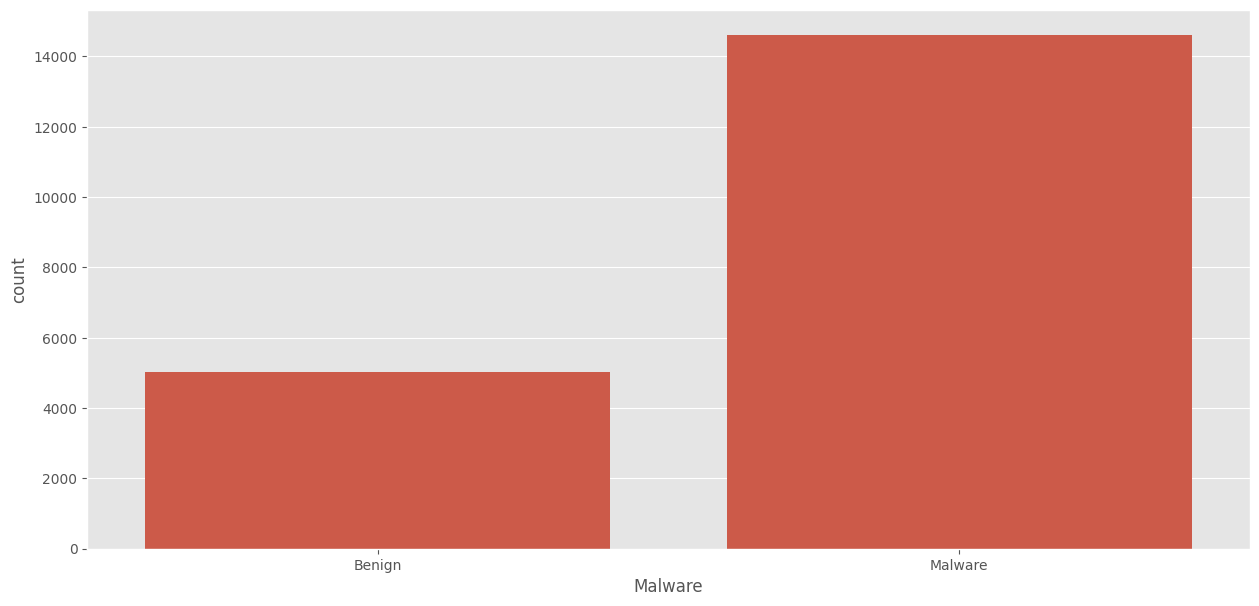

In [ ]:
ax=sns.countplot(df_train, x='Malware')
ax.set_xticks([0,1])
ax.set_xticklabels(['Benign', 'Malware'])
plt.show()

### Features visualization

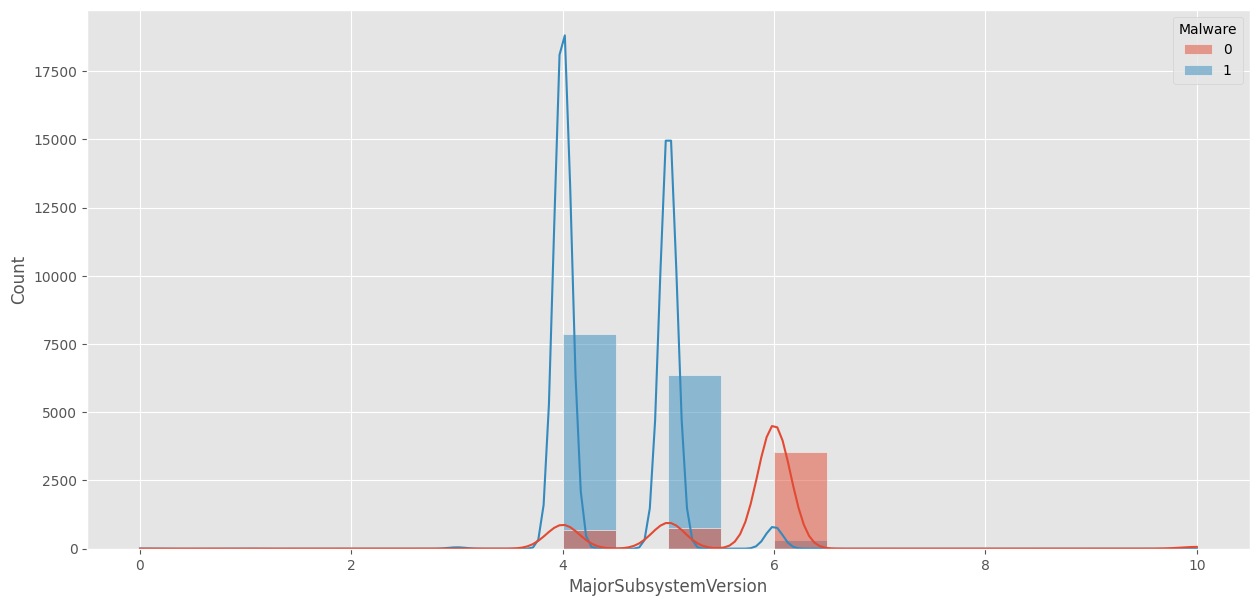

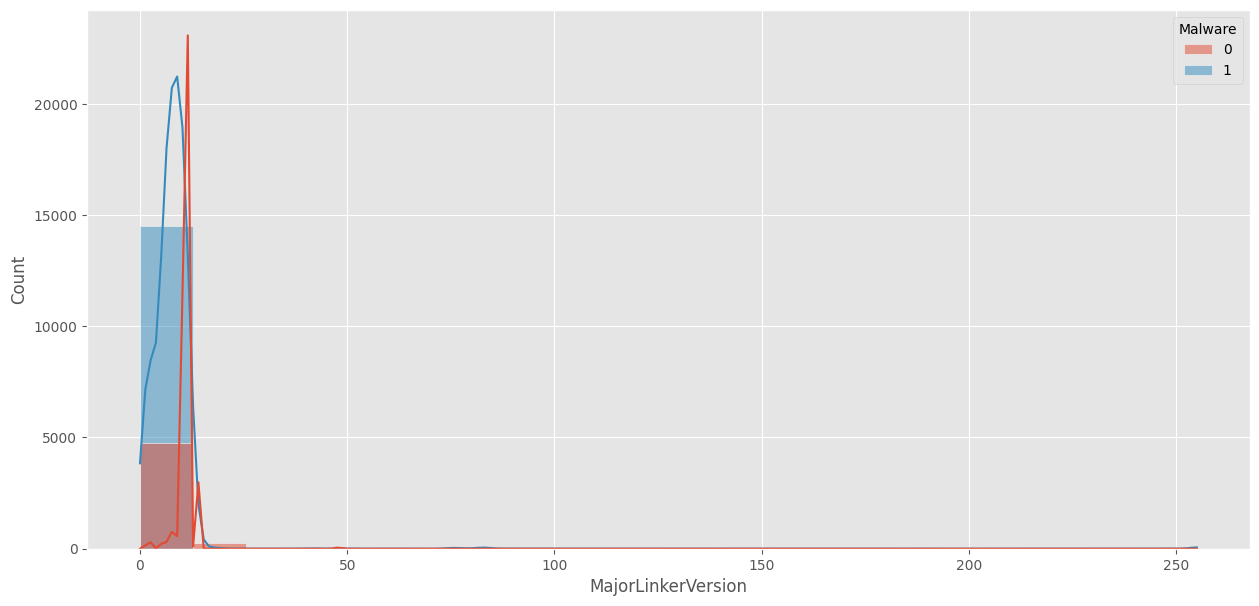

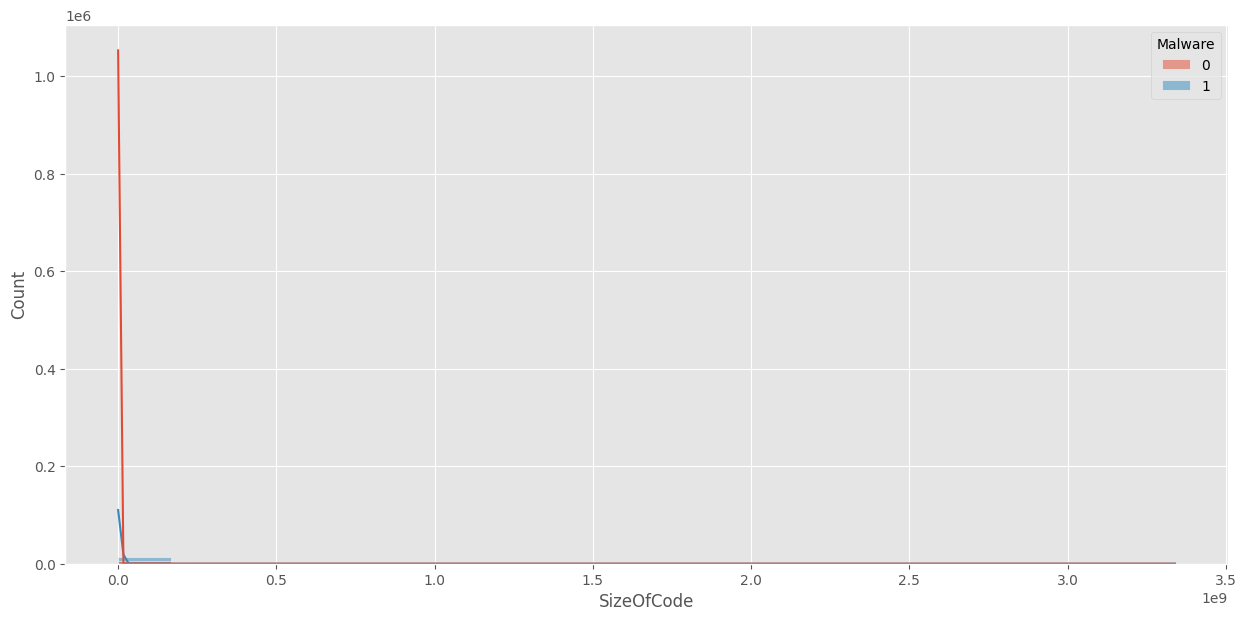

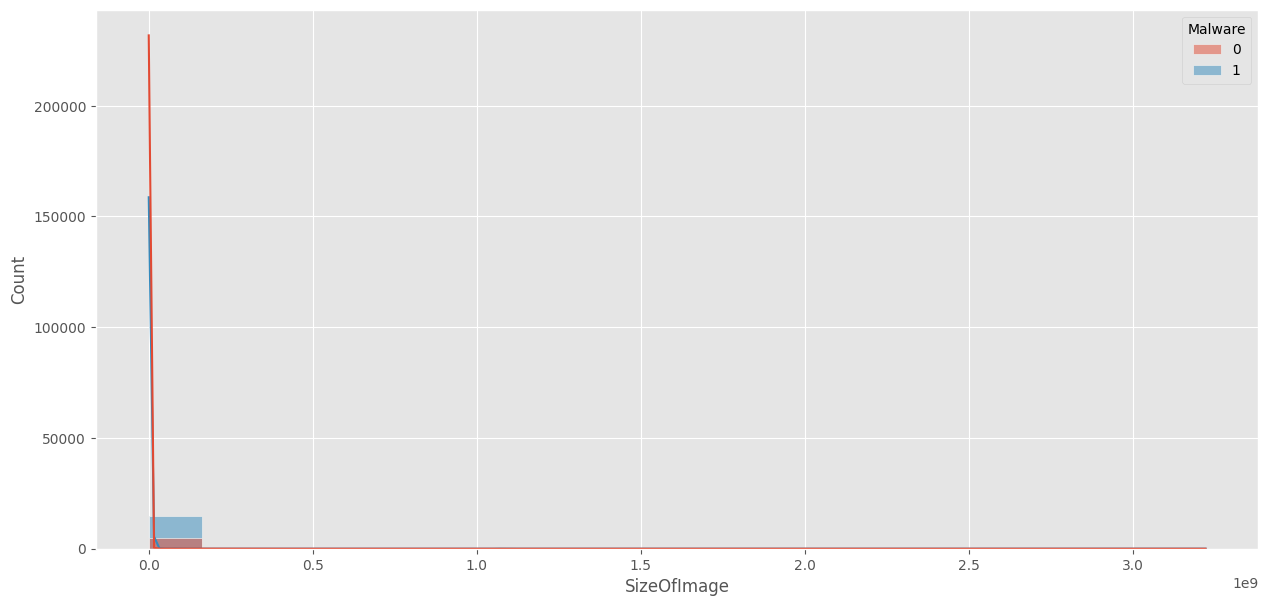

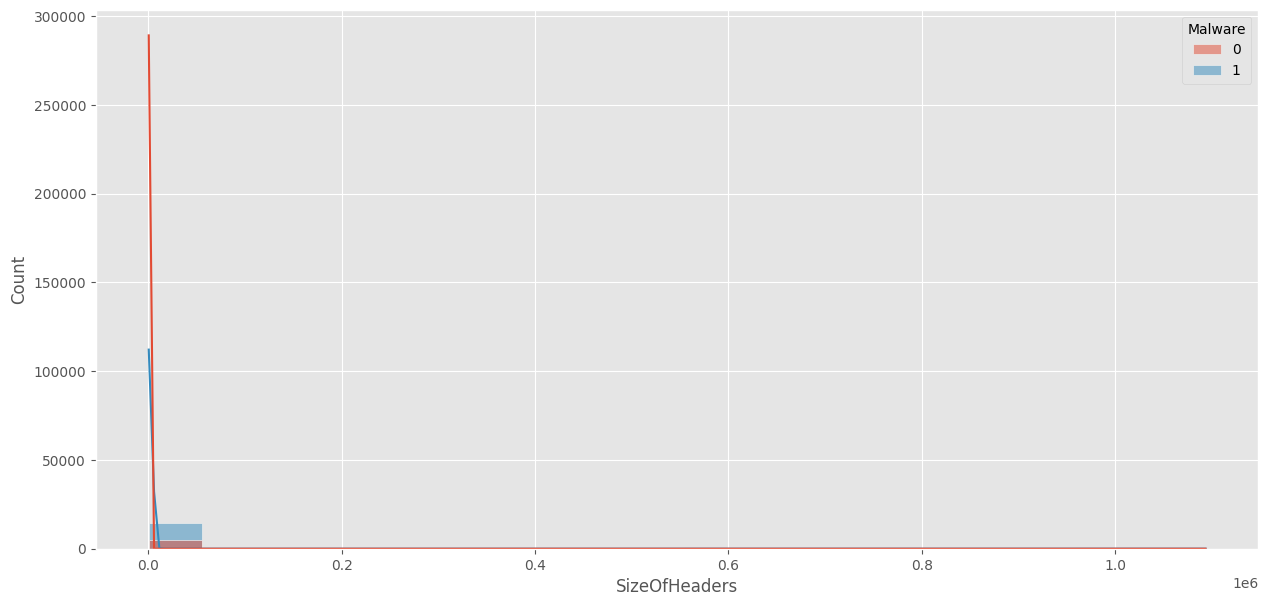

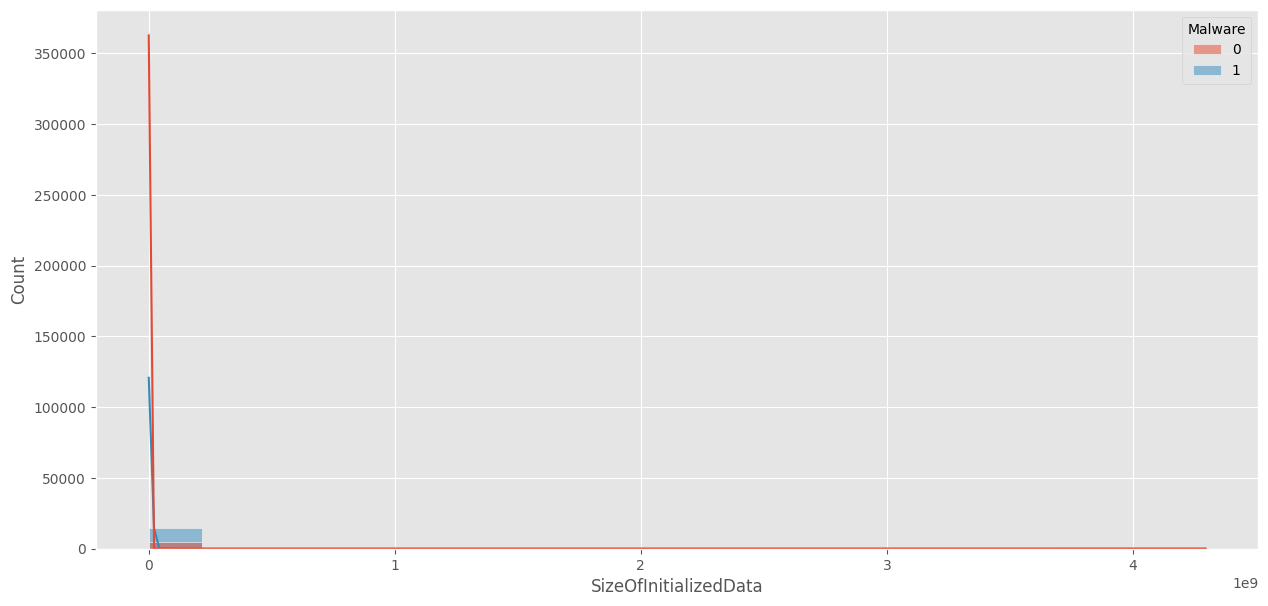

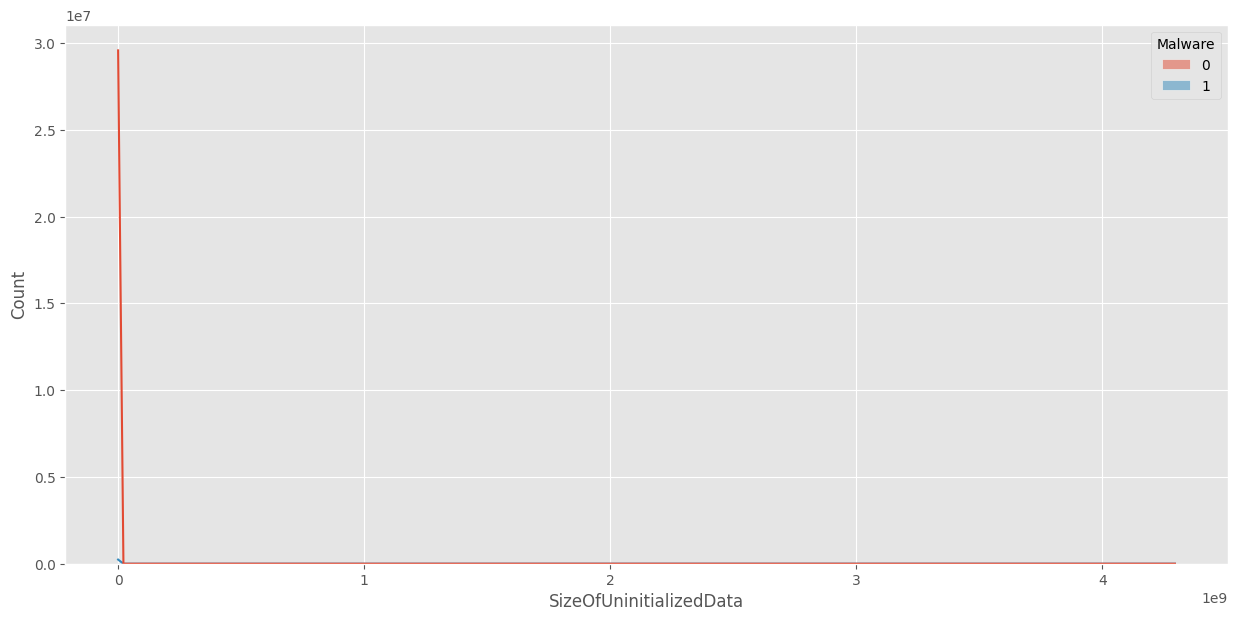

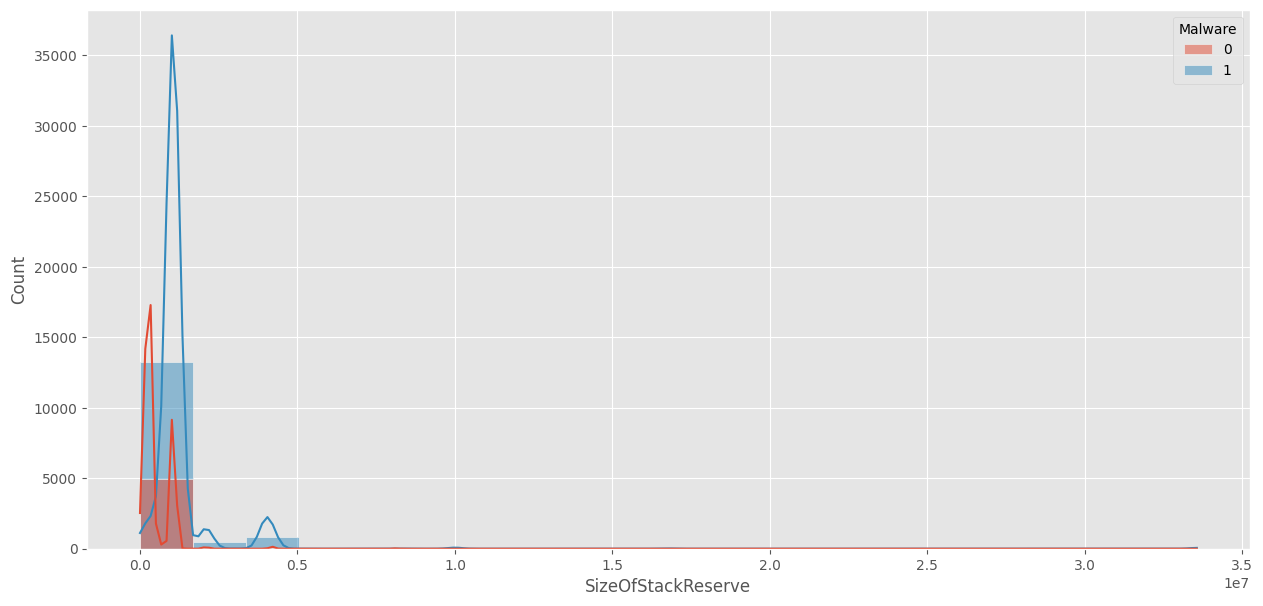

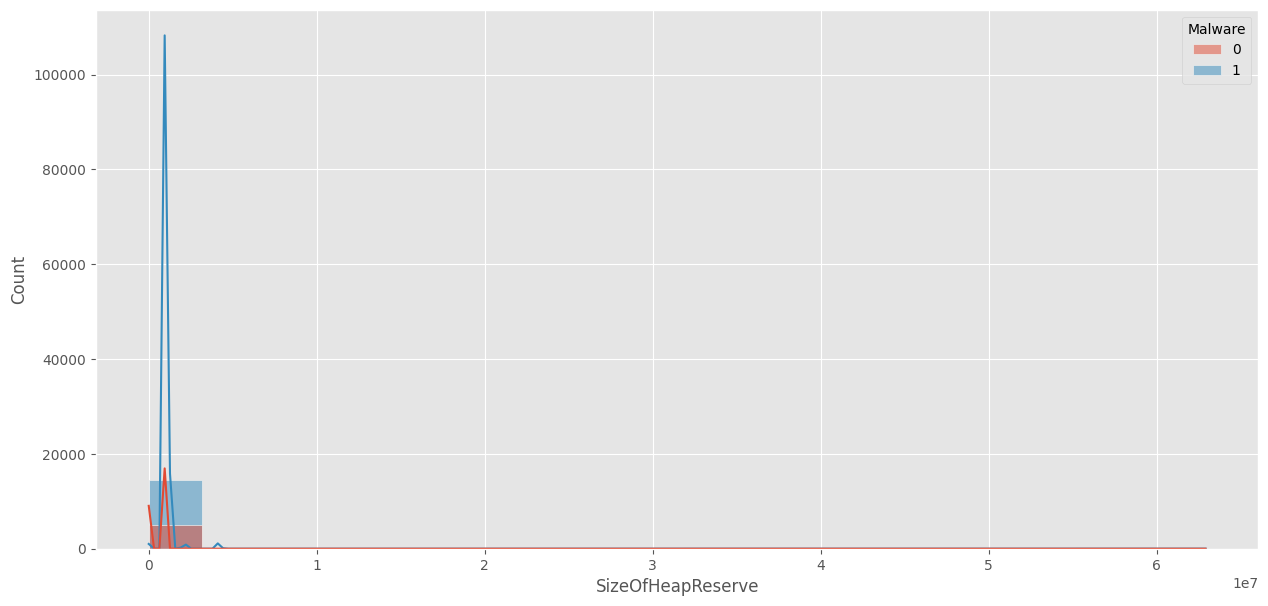

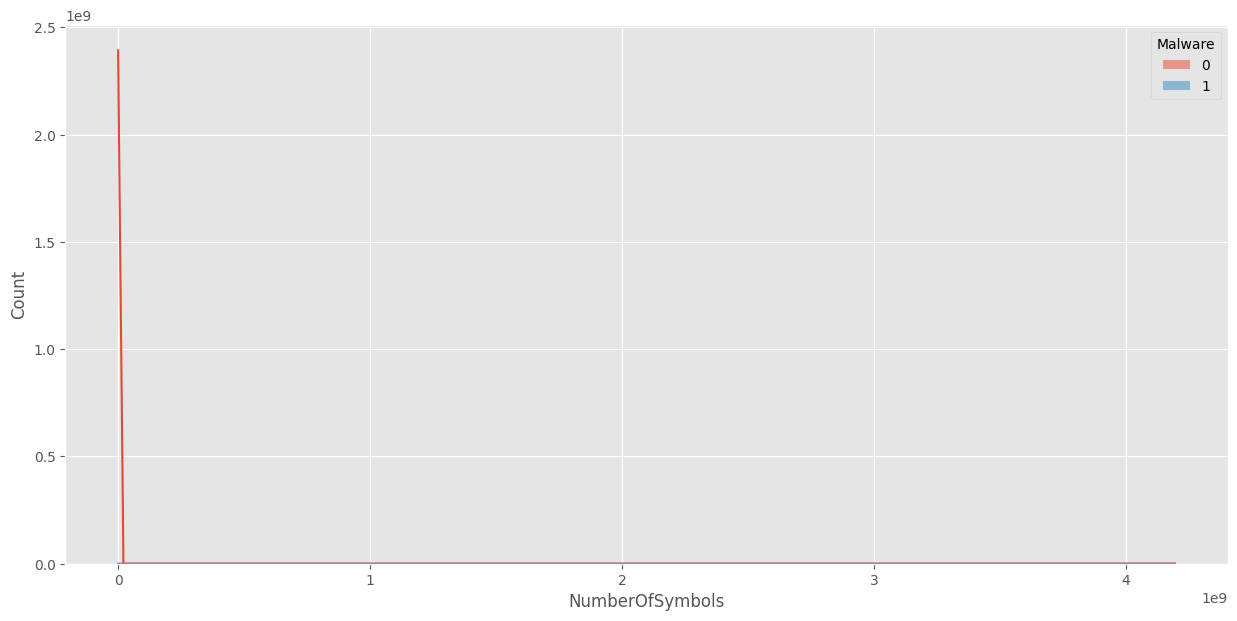

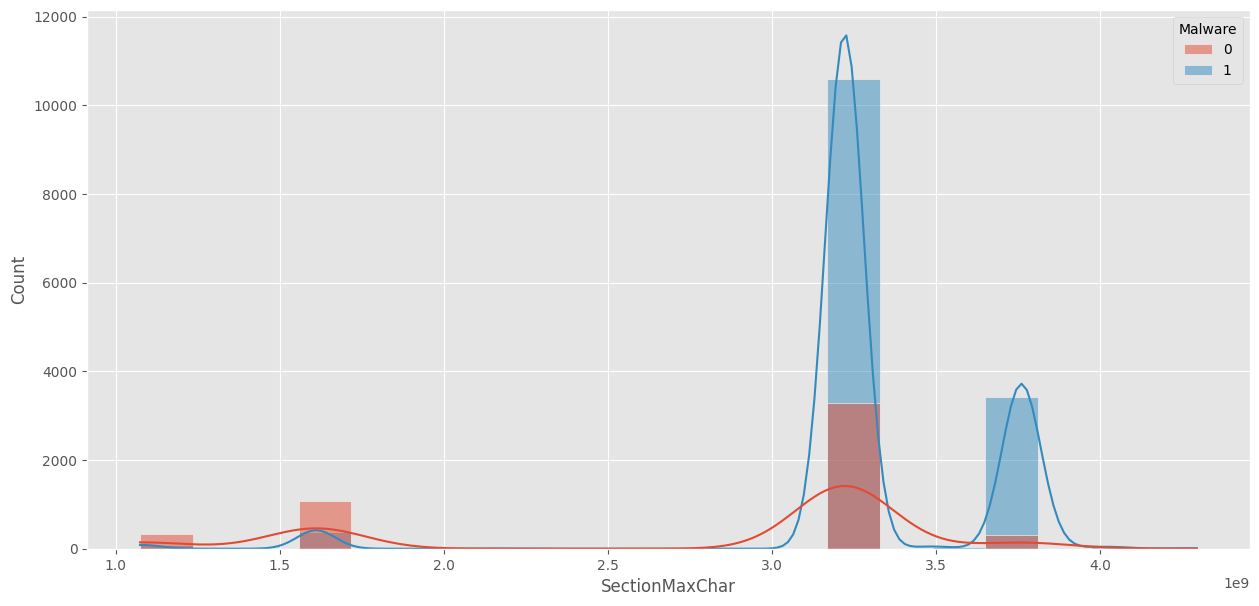

In [ ]:
features = ['MajorSubsystemVersion', 'MajorLinkerVersion', 'SizeOfCode', 'SizeOfImage', 'SizeOfHeaders', 'SizeOfInitializedData',
           'SizeOfUninitializedData', 'SizeOfStackReserve', 'SizeOfHeapReserve', 'NumberOfSymbols', 'SectionMaxChar']
df_display = df_train[features+['Malware']]

for feature in features:
    sns.histplot(data=df_display, x=feature, hue='Malware', kde=True, bins=20)
    plt.show()

### Splitting the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train_used, df_train['Malware'], test_size=0.2, random_state=0)

In [ ]:
print(f'Number of used features is {X_train.shape[1]}')

Number of used features is 65


### Building the model

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0, oob_score = True, max_depth = 16)
rfc.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,16
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [ ]:
y_pred = rfc.predict(X_test)

#### Classification report

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))


              precision    recall  f1-score   support

      Benign       0.99      0.96      0.97      1004
     Malware       0.99      1.00      0.99      2919

    accuracy                           0.99      3923
   macro avg       0.99      0.98      0.98      3923
weighted avg       0.99      0.99      0.99      3923



#### Confusion matrix

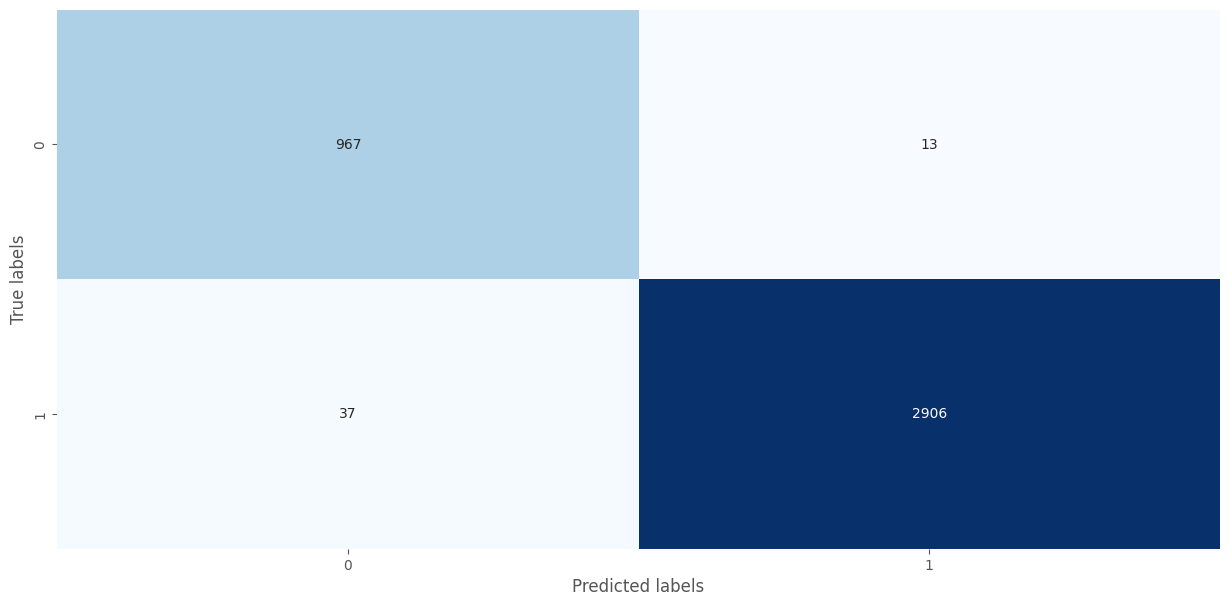

In [ ]:
ax=sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

#### Features Importance

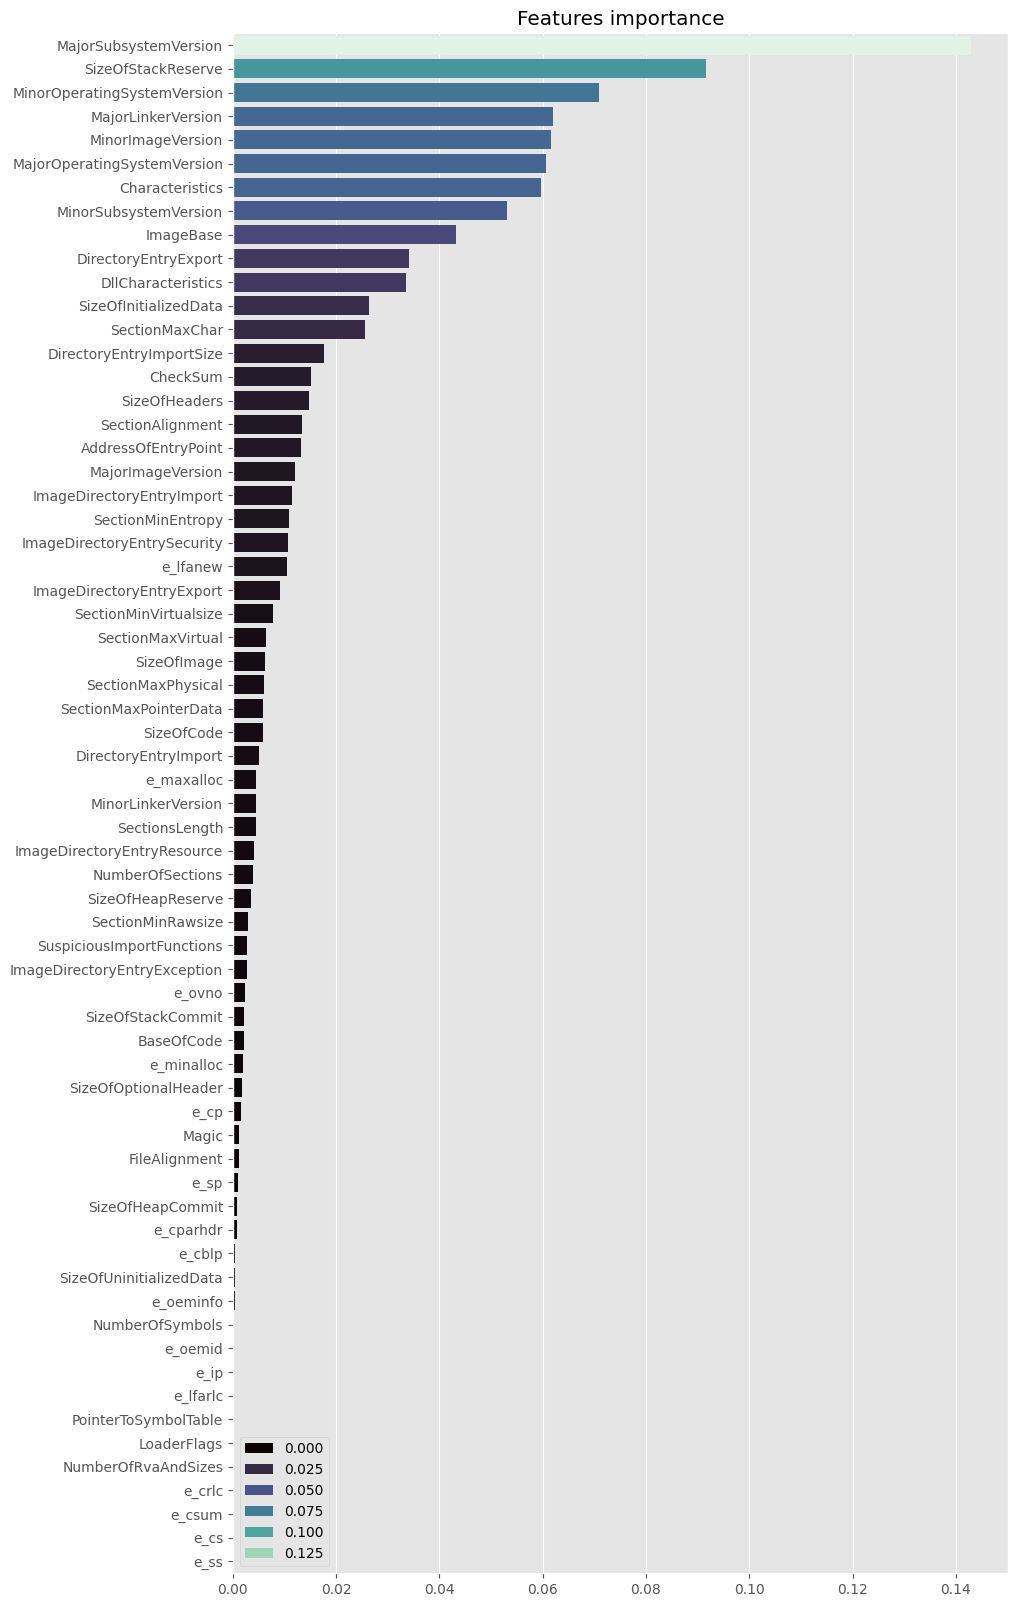

In [ ]:
importance = rfc.feature_importances_
importance_dict = {df_train_used.columns.values[i]: importance[i] for i in range (len(importance))}
sorted_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1])}
plt.figure(figsize=(10, 20))
sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako', hue=list(sorted_dict.values())[::-1])
plt.title('Features importance')
plt.show()